The main focus of this notebook is to run some probabilistic analysis on a dataset. The notebook also includes visualizations and statistics to help understand the distribution and correlations of the data.

# Environment Set up

## Mount Drive

In [2]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  import sys
  path_to_project = '/content/drive/MyDrive/FairAlgorithm'
  sys.path.append(path_to_project)
  !sudo apt install libcairo2-dev pkg-config python3-dev
  !{sys.executable} -m pip install -U ydata-profiling[notebook]
  !pip install jupyter-contrib-nbextensions
  !jupyter nbextension enable --py widgetsnbextension
  IN_COLAB = True
except:
  IN_COLAB = False

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libmount1 libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev
  libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import plotly
np.random.seed(0)
from rich import print
from rich.columns import Columns
from rich.panel import Panel
from rich.align import Align
from source.utils.print_util import *
from source.utils.data_preprocessing import *
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns

# Data Loading and Config

## Configuration

In [4]:
dataset_path = path_to_project + '/data/raw/stroke-prediction.csv' if IN_COLAB else 'data/raw/stroke-prediction.csv'
Y = 'stroke'

## Load Data

In [5]:
missing_values_format = ['Unknown', 'Other']
df = pd.read_csv(dataset_path, na_values=missing_values_format)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
import os
path_to_project = '/content/drive/MyDrive/FairAlgorithm'
os.makedirs(path_to_project, exist_ok=True)

profile = ProfileReport(df, title='Stroke Analysis Raw')
html_file = profile.to_file(path_to_project + '/data/reports/stroke_analysis_raw.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocessing


## Missing Values

In [6]:
# Drop unknown/missing values
df = df.dropna()

# Drop id column
df.drop(columns=['id'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 321.1+ KB


## Outlier Detection

In [7]:
# Integer attributes
fig = plotly.boxplot_frame(df, y=['age', 'avg_glucose_level', 'bmi'])
fig.show()


In [8]:
# Use the function in utils to remove outliers
attributes = ['age', 'avg_glucose_level', 'bmi']
df = search_and_remove_outliers(df, attributes)

╭───────────── Searching outliers for the following attributes: ['age', 'avg_glucose_level', 'bmi'] ──────────────╮
│                         ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓                          │
│                         ┃     Attribute     ┃ # Outliers ┃ MAX Outlier ┃ MIN Outlier ┃                          │
│                         ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩                          │
│                         │        age        │     0      │     nan     │     nan     │                          │
│                         │ avg_glucose_level │    465     │   271.74    │   175.29    │                          │
│                         │        bmi        │     78     │    92.0     │    11.5     │                          │
│                         └───────────────────┴────────────┴─────────────┴─────────────┘                          │
╰─────────────────────────────────────────────── OUTLIERS REMOVED ────────────────────────────────────────────────╯

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2882 entries, 2 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2882 non-null   object 
 1   age                2882 non-null   float64
 2   hypertension       2882 non-null   int64  
 3   heart_disease      2882 non-null   int64  
 4   ever_married       2882 non-null   object 
 5   work_type          2882 non-null   object 
 6   Residence_type     2882 non-null   object 
 7   avg_glucose_level  2882 non-null   float64
 8   bmi                2882 non-null   float64
 9   smoking_status     2882 non-null   object 
 10  stroke             2882 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 270.2+ KB


# Probabilistic Analysis

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1


In [15]:
# Probability of having diabetes
print('Number of stroke tuples:', df[df['stroke'] == 1].shape[0] )
print('Probability of stroke:', np.mean(df['stroke'] == 1), '\n')

# Probability of not having diabetes
print('Number of no stroke tuples:', df[df['stroke'] == 0].shape[0] )
print('Probability of no stroke:', np.mean(df['stroke'] == 0))

Number of stroke tuples: 116

Probability of stroke: 0.040249826509368494

Number of no stroke tuples: 2766

Probability of no stroke: 0.9597501734906315

In [16]:
# Probabilities given urban

# Data with only urban tuples
urban_data = df[df['Residence_type'] == 'Urban']

print('Probability of urban:', np.mean(df['Residence_type'] == 'Urban'))

# Calculate probability of stroke given urban
prob_stroke_given_urban = np.mean(urban_data['stroke'] == 1)
print('Probability of stroke given urban:', prob_stroke_given_urban)

# Calculate probability of no stroke given urban
prob_no_stroke_given_urban = np.mean(urban_data['stroke'] == 0)
print('Probability of no stroke given urban:', prob_no_stroke_given_urban)

Probability of urban: 0.5107564191533657

Probability of stroke given urban: 0.04008152173913043

Probability of no stroke given urban: 0.9599184782608695

In [17]:
# Probabilities given rural

# Data with only rural tuples
rural_data = df[df['Residence_type'] == 'Rural']

print('Probability of rural:', np.mean(df['Residence_type'] == 'Rural'))

# Calculate probability of stroke given rural
prob_stroke_given_rural = np.mean(rural_data['stroke'] == 1)
print('Probability of stroke given rural:', prob_stroke_given_rural)

# Calculate probability of no stroke given rural
prob_no_stroke_given_rural = np.mean(rural_data['stroke'] == 0)
print('Probability of no stroke given rural:', prob_no_stroke_given_rural)

Probability of rural: 0.4892435808466343

Probability of stroke given rural: 0.04042553191489362

Probability of no stroke given rural: 0.9595744680851064

# Transformation

In [18]:
work_type_values = df.work_type.unique().tolist()
work_type_mapping = dict(zip(work_type_values, [x for x in range(len(work_type_values))]))
work_type_mapping
df["work_category"] = df["work_type"].map(work_type_mapping)

smoking_status_mapping = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3}
df["smoking_category"] = df["smoking_status"].map(smoking_status_mapping)

residence_type_mapping = {'Rural': 0, 'Urban': 1}
df["residence_category"] = df["Residence_type"].map(residence_type_mapping)

ever_married_mapping = {'No': 0, 'Yes': 1}
df["married_category"] = df["ever_married"].map(ever_married_mapping)

gender_mapping = {'Female': 0, 'Male': 1}
df["gender_category"] = df["gender"].map(gender_mapping)

# 1 if age > 25 else 0
df["age_category"] = df.apply(lambda row: age_category(row, "age"), axis=1)

df["stroke_prediction"] = df["stroke"]

In [19]:
df = df.drop(columns=['gender', 'age', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2882 entries, 2 to 5108
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hypertension        2882 non-null   int64  
 1   heart_disease       2882 non-null   int64  
 2   avg_glucose_level   2882 non-null   float64
 3   bmi                 2882 non-null   float64
 4   work_category       2882 non-null   int64  
 5   smoking_category    2882 non-null   int64  
 6   residence_category  2882 non-null   int64  
 7   married_category    2882 non-null   int64  
 8   gender_category     2882 non-null   int64  
 9   age_category        2882 non-null   int64  
 10  stroke_prediction   2882 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 270.2 KB


In [21]:
df.head()

,hypertension,heart_disease,avg_glucose_level,bmi,work_category,smoking_category,residence_category,married_category,gender_category,age_category,stroke_prediction
2,0,1,105.92,32.5,0,0,0,1,1,1,1
3,0,0,171.23,34.4,0,2,1,1,0,1,1
4,1,0,174.12,24.0,1,0,0,1,0,1,1
6,1,1,70.09,27.4,0,0,0,1,1,1,1
7,0,0,94.39,22.8,0,0,1,0,0,1,1


In [22]:
# Shuffle data frame to avoid errors when training i.e. due to unbalanced datasets
df = df.sample(frac=1)
df.head()

,hypertension,heart_disease,avg_glucose_level,bmi,work_category,smoking_category,residence_category,married_category,gender_category,age_category,stroke_prediction
2142,0,0,77.73,19.2,0,0,0,1,0,0,0
1385,0,0,89.05,27.8,0,1,1,1,0,1,0
3199,0,0,92.15,20.8,2,0,1,1,0,1,0
5024,0,0,153.34,31.5,0,0,0,1,1,1,0
3046,0,0,103.17,32.1,1,1,0,1,0,1,0


# Visualization

<Axes: >

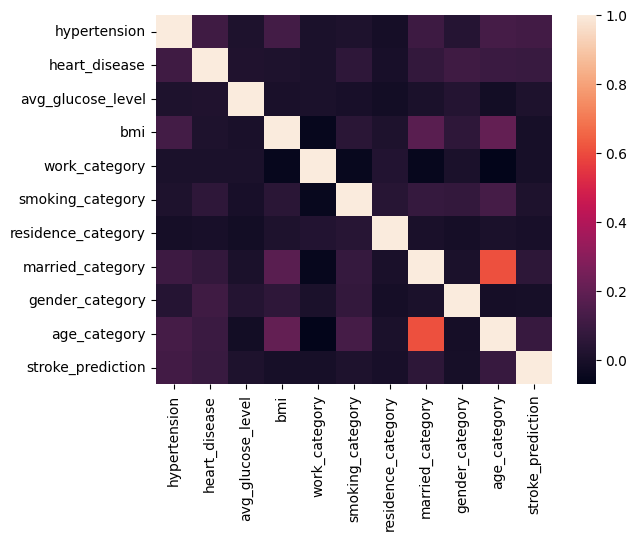

In [23]:
sns.heatmap(df.corr(method='pearson'))

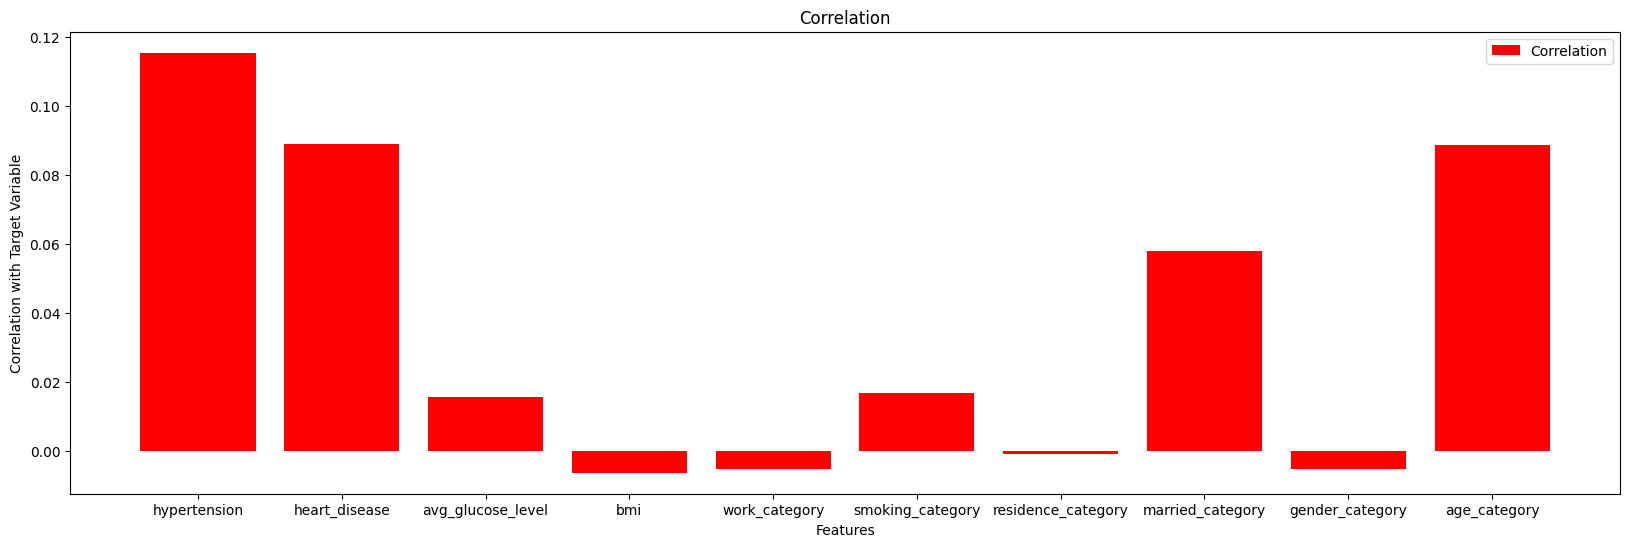

In [24]:
plt.figure(figsize=(20, 6))
plt.bar(df.columns.to_list()[:-1], df.corr()['stroke_prediction'].to_list()[:-1], color='r', label='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation')
plt.legend()
plt.grid(False)
plt.show()

# Dimensionality Reduction

In [25]:
# Drop columns that have less than 0.05 correlation with target
features_corr = [(column, correlation) for column, correlation in zip(df.columns, df.corr()['stroke_prediction'])]

# Column list if correlation > 0.05
features = [item[0] for item in features_corr if item[1] > 0.05]

# I decided not to perfom dimensionality reduction
df[features]

,hypertension,heart_disease,married_category,age_category,stroke_prediction
2142,0,0,1,0,0
1385,0,0,1,1,0
3199,0,0,1,1,0
5024,0,0,1,1,0
3046,0,0,1,1,0
...,...,...,...,...,...
1363,0,0,1,1,0
1495,0,0,1,1,0
2964,0,0,1,1,0
4642,1,0,1,1,0


In [26]:
# Shuffle data frame to avoid errors when training i.e. due to unbalanced datasets
df = df.sample(frac=1)
df.head()

,hypertension,heart_disease,avg_glucose_level,bmi,work_category,smoking_category,residence_category,married_category,gender_category,age_category,stroke_prediction
273,0,0,109.82,23.7,0,0,1,1,0,1,0
2159,0,0,65.66,33.7,2,0,1,1,0,1,0
2830,0,0,125.30,29.7,0,1,1,1,0,1,0
268,0,1,67.84,25.2,1,2,1,1,0,1,0
2405,1,0,63.95,32.2,0,0,1,0,1,1,0


# Save Dataset

In [27]:
saving_path = path_to_project + '/data/preprocessed/preprocessed-stroke-prediction.csv' if IN_COLAB else 'data/preprocessed/preprocessed-stroke-prediction.csv'
df.to_csv(saving_path, sep=',', index=False, encoding='utf-8')

In [28]:
import os
path_to_project = '/content/drive/MyDrive/FairAlgorithm'
os.makedirs(path_to_project, exist_ok=True)

profile = ProfileReport(df, title='Stroke Analysis')
html_file = profile.to_file(path_to_project + '/data/reports/stroke_analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]